# Zomato Food Delivery Forecasting

### Importing libraries and dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics 
from sklearn.svm import SVC 
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as mae

import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('dataset.csv') 
df.head()


,datetime,weather,temperature,humidity,windspeed,rain,delivered,count
0,12-12-2023 08:00,1,9.4,60,0,5,20,25
1,12-12-2023 12:00,1,9.7,55,0,8,15,23
2,12-12-2023 18:00,1,9.2,70,0,3,18,21
3,13-11-2023 09:30,1,9.8,80,0,6,22,28
4,13-11-2023 15:45,1,9.5,75,0,7,25,32


### Displaying the entire dataset

In [3]:
df

,datetime,weather,temperature,humidity,windspeed,rain,delivered,count
0,12-12-2023 08:00,1,9.4,60,0,5,20,25
1,12-12-2023 12:00,1,9.7,55,0,8,15,23
2,12-12-2023 18:00,1,9.2,70,0,3,18,21
3,13-11-2023 09:30,1,9.8,80,0,6,22,28
4,13-11-2023 15:45,1,9.5,75,0,7,25,32
5,14-11-2023 08:30,1,9.3,65,0,4,19,23
6,14-12-2023 14:15,1,9.9,72,0,5,23,28
7,14-12-2023 19:45,1,9.6,68,0,6,21,27
8,15-12-2023 10:00,1,9.1,58,0,4,20,24
9,15-12-2023 16:30,1,9.7,63,0,7,24,31


In [4]:
df.shape


(48, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     48 non-null     object 
 1   weather      48 non-null     int64  
 2   temperature  48 non-null     float64
 3   humidity     48 non-null     int64  
 4   windspeed    48 non-null     int64  
 5   rain         48 non-null     int64  
 6   delivered    48 non-null     int64  
 7   count        48 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 3.1+ KB


In [6]:
df.describe()


,weather,temperature,humidity,windspeed,rain,delivered,count
count,48.0,48.000000,48.000000,48.0,48.000000,48.000000,48.000000
mean,1.0,9.495833,67.395833,0.0,5.479167,21.020833,26.500000
std,0.0,0.253451,6.360582,0.0,1.597732,2.513704,3.643706
min,1.0,9.100000,55.000000,0.0,3.000000,15.000000,19.000000
25%,1.0,9.300000,63.000000,0.0,4.000000,19.000000,24.000000
50%,1.0,9.500000,67.500000,0.0,5.500000,21.000000,26.000000
75%,1.0,9.700000,72.000000,0.0,7.000000,23.000000,29.000000
max,1.0,9.900000,80.000000,0.0,8.000000,25.000000,33.000000


### Data Cleaning

In [7]:
df.isnull().sum()

datetime       0
weather        0
temperature    0
humidity       0
windspeed      0
rain           0
delivered      0
count          0
dtype: int64

### Feature Engineering

In [8]:
parts = df["datetime"].str.split(" ", n=2, expand=True) 
df["date"] = parts[0] 
df["time"] = parts[1].str[:2].astype('int') 
df.head() 


,datetime,weather,temperature,humidity,windspeed,rain,delivered,count,date,time
0,12-12-2023 08:00,1,9.4,60,0,5,20,25,12-12-2023,8
1,12-12-2023 12:00,1,9.7,55,0,8,15,23,12-12-2023,12
2,12-12-2023 18:00,1,9.2,70,0,3,18,21,12-12-2023,18
3,13-11-2023 09:30,1,9.8,80,0,6,22,28,13-11-2023,9
4,13-11-2023 15:45,1,9.5,75,0,7,25,32,13-11-2023,15


In [9]:
parts = df["date"].str.split("-", n=3, expand=True) 
df["day"] = parts[0].astype('int') 
df["month"] = parts[1].astype('int') 
df["year"] = parts[2].astype('int') 
df.head() 


,datetime,weather,temperature,humidity,windspeed,rain,delivered,count,date,time,day,month,year
0,12-12-2023 08:00,1,9.4,60,0,5,20,25,12-12-2023,8,12,12,2023
1,12-12-2023 12:00,1,9.7,55,0,8,15,23,12-12-2023,12,12,12,2023
2,12-12-2023 18:00,1,9.2,70,0,3,18,21,12-12-2023,18,12,12,2023
3,13-11-2023 09:30,1,9.8,80,0,6,22,28,13-11-2023,9,13,11,2023
4,13-11-2023 15:45,1,9.5,75,0,7,25,32,13-11-2023,15,13,11,2023


In [10]:
def am_or_pm(x): 
   if x > 11: 
        return 1
   else: 
        return 0


df['am_or_pm'] = df['time'].apply(am_or_pm) 
df.head() 


,datetime,weather,temperature,humidity,windspeed,rain,delivered,count,date,time,day,month,year,am_or_pm
0,12-12-2023 08:00,1,9.4,60,0,5,20,25,12-12-2023,8,12,12,2023,0
1,12-12-2023 12:00,1,9.7,55,0,8,15,23,12-12-2023,12,12,12,2023,1
2,12-12-2023 18:00,1,9.2,70,0,3,18,21,12-12-2023,18,12,12,2023,1
3,13-11-2023 09:30,1,9.8,80,0,6,22,28,13-11-2023,9,13,11,2023,0
4,13-11-2023 15:45,1,9.5,75,0,7,25,32,13-11-2023,15,13,11,2023,1


In [11]:
df.drop(['datetime', 'date'], axis=1, inplace=True) 


In [12]:
df

,weather,temperature,humidity,windspeed,rain,delivered,count,time,day,month,year,am_or_pm
0,1,9.4,60,0,5,20,25,8,12,12,2023,0
1,1,9.7,55,0,8,15,23,12,12,12,2023,1
2,1,9.2,70,0,3,18,21,18,12,12,2023,1
3,1,9.8,80,0,6,22,28,9,13,11,2023,0
4,1,9.5,75,0,7,25,32,15,13,11,2023,1
5,1,9.3,65,0,4,19,23,8,14,11,2023,0
6,1,9.9,72,0,5,23,28,14,14,12,2023,1
7,1,9.6,68,0,6,21,27,19,14,12,2023,1
8,1,9.1,58,0,4,20,24,10,15,12,2023,0
9,1,9.7,63,0,7,24,31,16,15,12,2023,1


### Data Exploration and Visualization

#### calculates the number of missing values (NaN or null) in each column of the DataFrame

In [13]:
df.isnull().sum()

weather        0
temperature    0
humidity       0
windspeed      0
rain           0
delivered      0
count          0
time           0
day            0
month          0
year           0
am_or_pm       0
dtype: int64

#### In the below code, for each feature (day, time, month), it plots the average count of a variable against the feature values. 
#### Each subplot represents a feature, plotted in red.

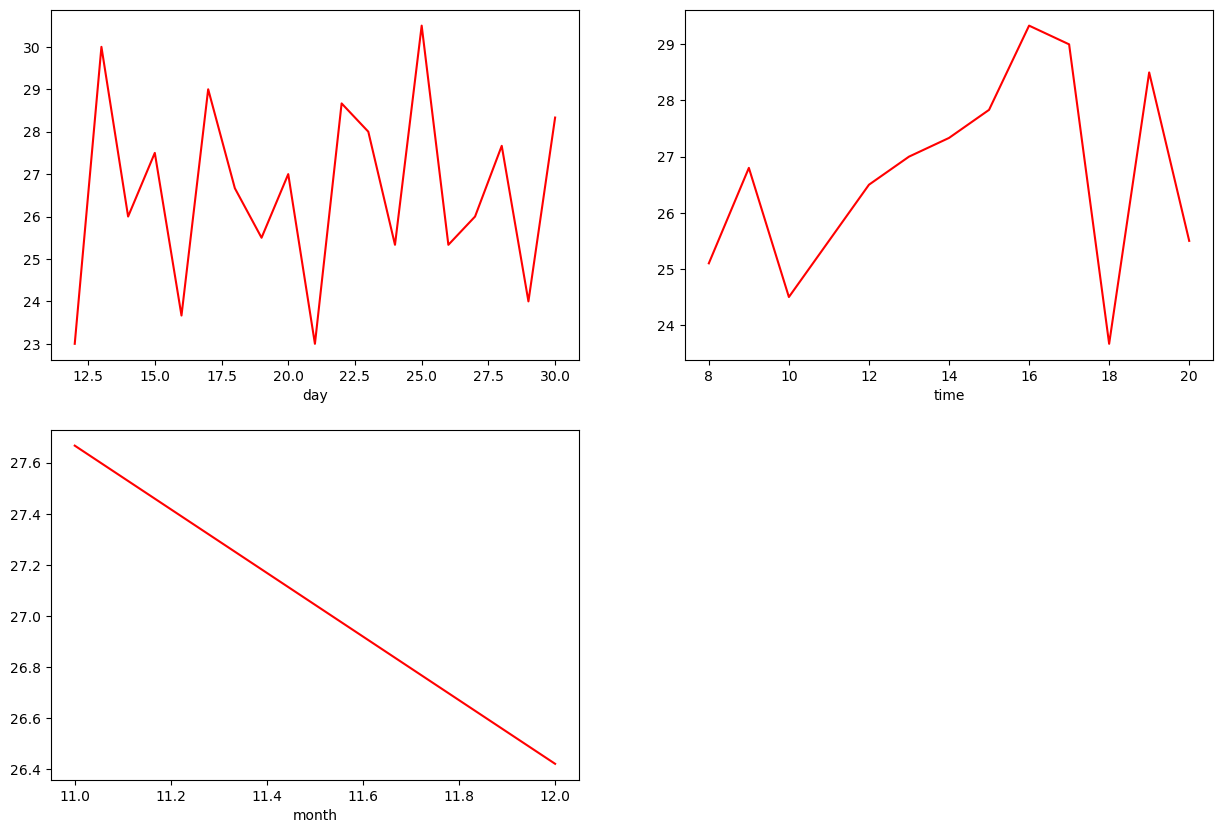

In [14]:
features = ['day', 'time', 'month'] 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    df.groupby(col).mean()['count'].plot(color='red') 
plt.show() 


#### The below code plots the average count of a variable against categorical features (weather, am_or_pm, year) in bar plots. 
#### Each subplot represents a feature, with bars colored red.


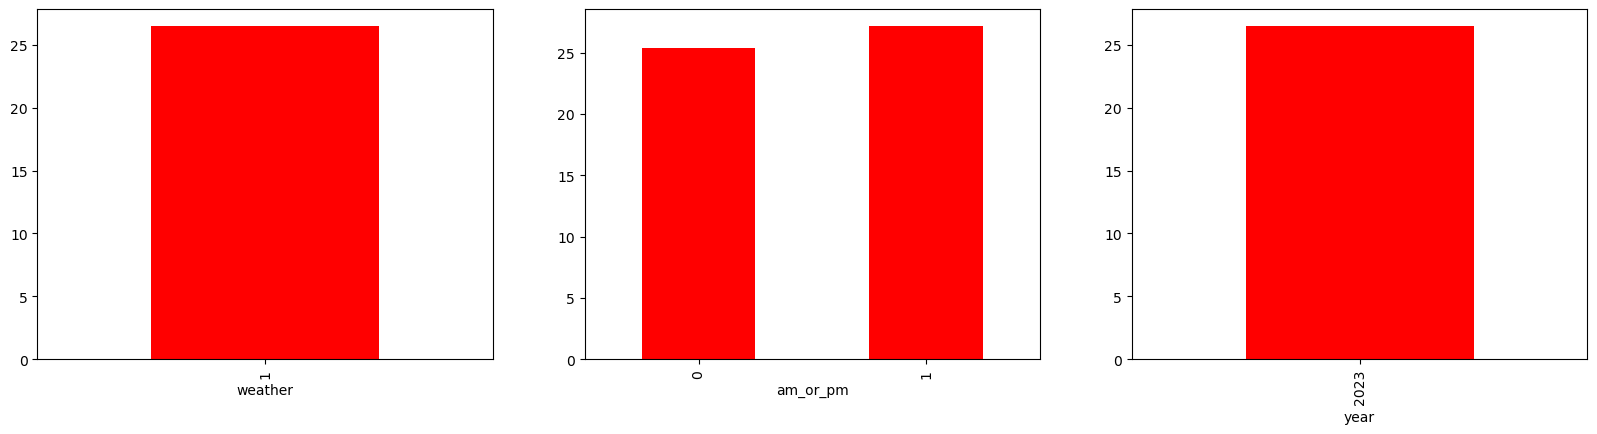

In [15]:
features = [ 'weather','am_or_pm','year'] 

plt.subplots(figsize=(20, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 3, i + 1) 
    df.groupby(col).mean()['count'].plot.bar(color='red') 
plt.show() 


#### The code generates three subplots, each displaying the distribution of a variable (temperature, rain, windspeed) using kernel density estimation. 

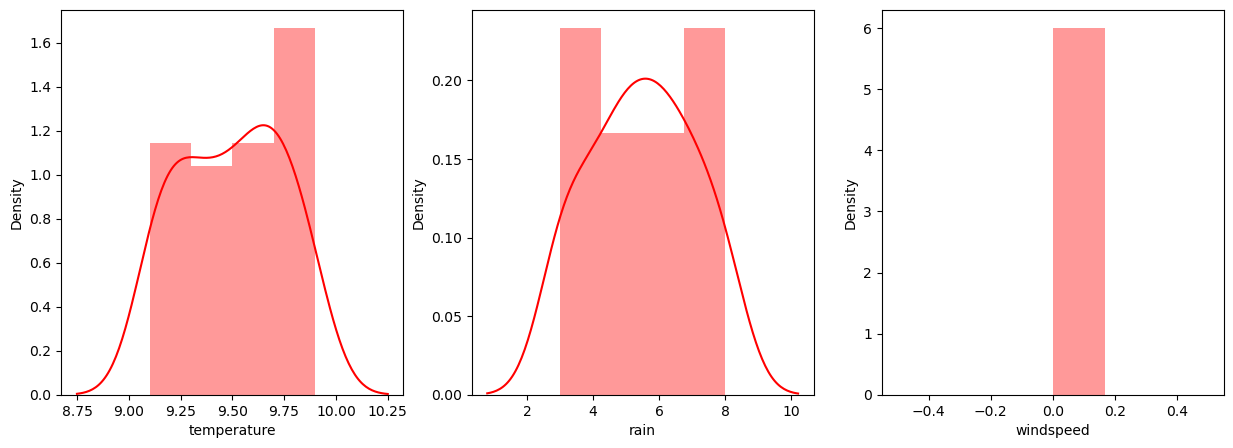

In [16]:
features = ['temperature', 'rain','windspeed'] 

plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
     plt.subplot(1, 3, i + 1) 
     sb.distplot(df[col], color='red') 
plt.show()


#### The code creates three subplots, each depicting the distribution of a variable (temperature, windspeed, rain) using box plots.

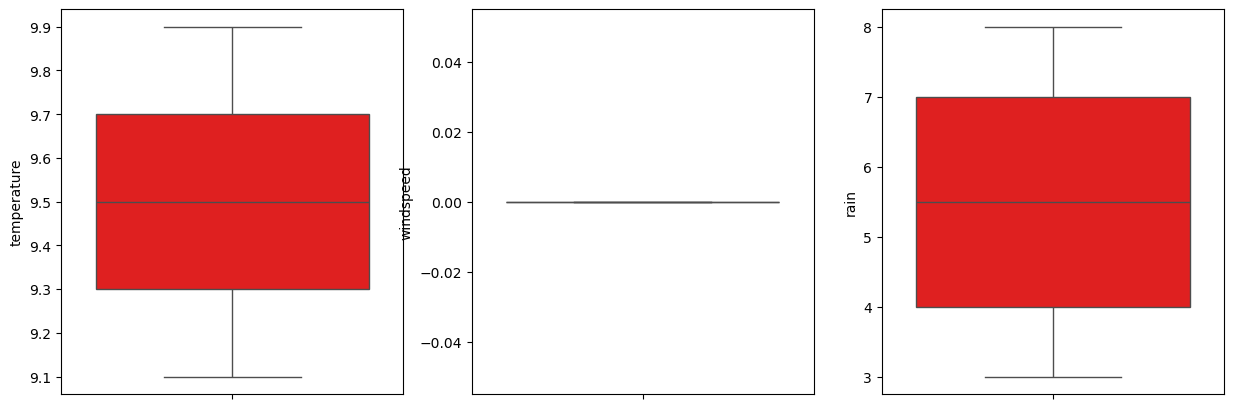

In [17]:
features = ['temperature','windspeed','rain'] 

plt.subplots(figsize=(15, 5)) 
for i, col in enumerate(features): 
    plt.subplot(1, 3, i + 1) 
    sb.boxplot(df[col], color='red') 
plt.show()


#### The code generates four subplots, each illustrating the distribution of a variable (humidity, rain, delivered, count) using box plots.

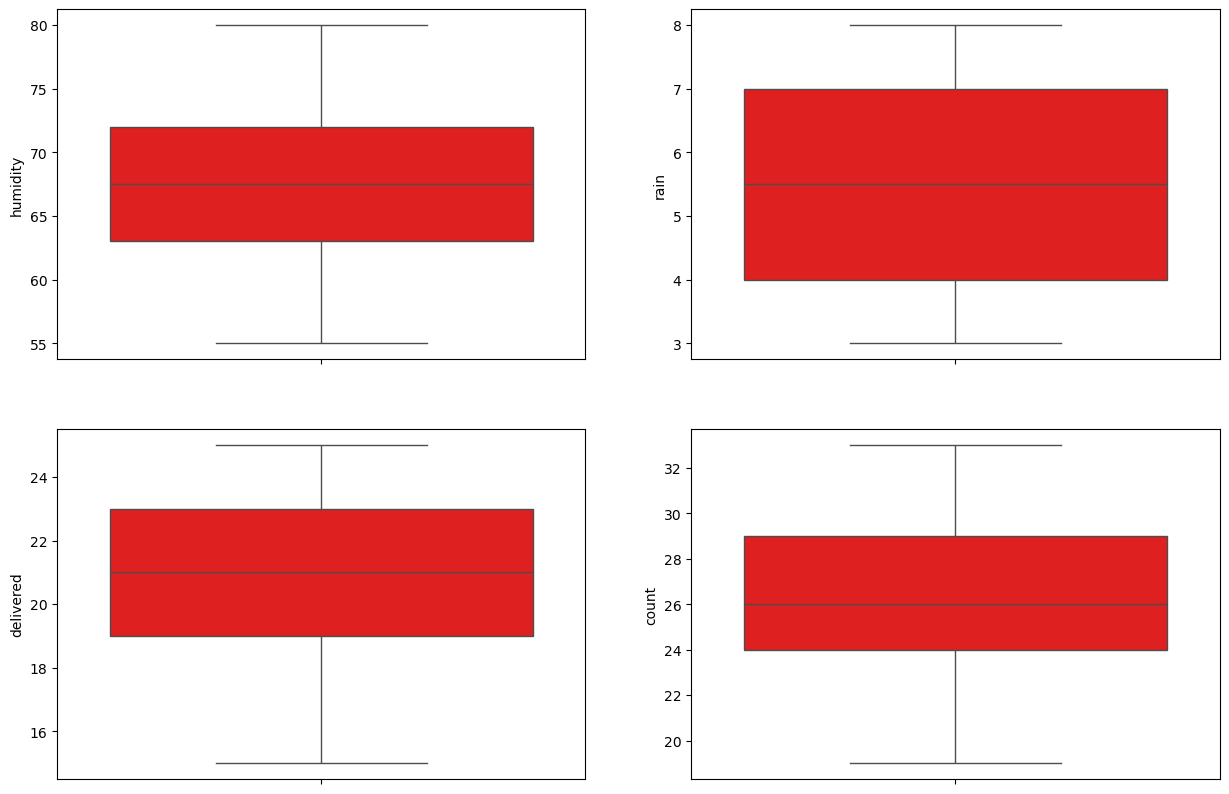

In [18]:
features = ['humidity', 'rain', 'delivered', 'count'] 

plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    sb.boxplot(df[col],color='red') 
plt.show() 


#### These plots were necessary to visually explore the distribution and variability of different variables in the dataset. 
#### Box plots provide insights into the central tendency, spread, and presence of outliers in the data, while kernel density estimation 
#### plots (distplots) offer a smooth representation of the distribution of numerical variables. 
#### These visualizations help in identifying patterns, trends, and potential anomalies in the data, aiding in data 
#### understanding and decision-making during the analysis process.


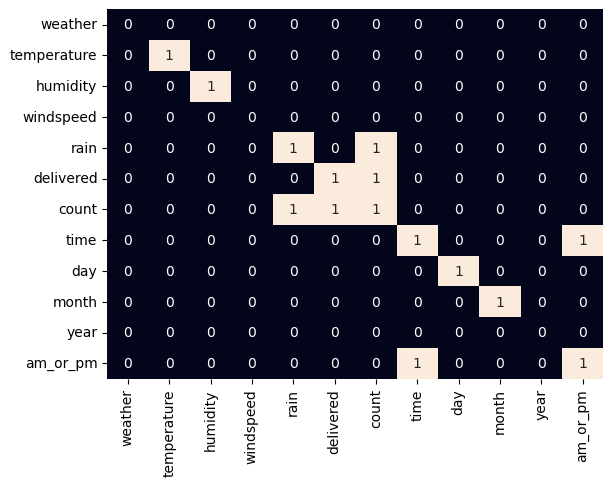

In [19]:
sb.heatmap(df.corr() > 0.8, 
        annot=True, 
        cbar=False) 
plt.show()


#####  By creating the heatmap, we can quickly identify strong correlations between pairs of variables, 
##### which is crucial for feature selection and understanding the relationships within the dataset. 
##### It helps in identifying potential multicollinearity issues and guides the selection of variables for 
##### predictive modeling or further analysis

In [20]:
df.drop(['delivered', 'time'], axis=1, inplace=True) 
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]


#### columns 'delivered' and 'time' are dropped from the DataFrame  to remove irrelevant or redundant features that are not useful for the analysis or modeling process.

#### A filtering condition is applied to the DataFrame which retains only the rows where the 'windspeed' is less 
#### than 32 and the 'humidity' is greater than 0. 
#### This filtering likely removes data points that fall outside of acceptable ranges or thresholds for these variables,
#### ensuring data quality and relevance for subsequent analysis or modeling.


In [21]:
df

,weather,temperature,humidity,windspeed,rain,count,day,month,year,am_or_pm
0,1,9.4,60,0,5,25,12,12,2023,0
1,1,9.7,55,0,8,23,12,12,2023,1
2,1,9.2,70,0,3,21,12,12,2023,1
3,1,9.8,80,0,6,28,13,11,2023,0
4,1,9.5,75,0,7,32,13,11,2023,1
5,1,9.3,65,0,4,23,14,11,2023,0
6,1,9.9,72,0,5,28,14,12,2023,1
7,1,9.6,68,0,6,27,14,12,2023,1
8,1,9.1,58,0,4,24,15,12,2023,0
9,1,9.7,63,0,7,31,15,12,2023,1


### Model Training
#### 90% of the data is used for training (X_train, Y_train), and the remaining 10% is used for testing

In [22]:
features = df.drop(['count'], axis=1) 
target = df['count'].values 

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.1, random_state=22) 
X_train.shape, X_val.shape


((43, 9), (5, 9))

### Normalization

In [23]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val) 


### Results

In [24]:
models = [GaussianNB(), KNeighborsRegressor(), LinearRegression(), SVC()]

# Train and evaluate each model
for model in models:
    model.fit(X_train, Y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Print model and evaluation metrics
    print(f'{model}:')
    print('Training Error:', mae(Y_train, train_preds))
    print('Validation Error:', mae(Y_val, val_preds))
    print()


GaussianNB():
Training Error: 1.2093023255813953
Validation Error: 2.2

KNeighborsRegressor():
Training Error: 1.7674418604651156
Validation Error: 2.9599999999999995

LinearRegression():
Training Error: 1.4341979231352462
Validation Error: 1.7662216327526359

SVC():
Training Error: 1.5348837209302326
Validation Error: 2.4



### LinearRegression model is performing the best since it results in lowest Validation error